# Aula 1

## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Gerando DataFrame a partir de arquivo .csv

In [2]:
dataset_path_to = "../../assets/datasets/ml-latest-small/"

movielens = {
    "movies":pd.read_csv(dataset_path_to + "movies.csv"),
    "ratings":pd.read_csv(dataset_path_to + "ratings.csv")
}

movielens["movies"].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movielens["ratings"].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Descrição de variável com júpiter

Utilizando o caractere `?` antes da variável

In [4]:
?dataset_path_to

Type:        str
String form: ../../assets/datasets/ml-latest-small/
Length:      38
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.


## Descrição de DataFrame

In [5]:
movielens["ratings"].describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Analisando Toy Story

In [6]:
# Filtrando amostras cujo movieId é o mesmo do Toy Story
resultadoToyStory = movielens["ratings"].query("movieId==1")

resultadoToyStory.describe()

,userId,movieId,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


[4.  4.5 2.5 3.5 3.  5.  0.5 2.  1.5]


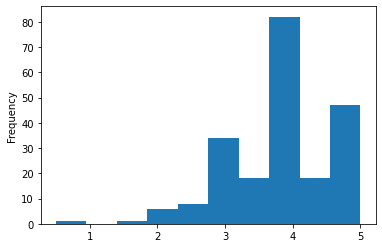

In [7]:
print(resultadoToyStory["rating"].unique())

# Exibe o histograma de frequência das notas
resultadoToyStory["rating"].plot(kind="hist")

## Agrupando média das avaliações por filme

In [8]:
ratings = movielens["ratings"]
movies = movielens["movies"]

group_ratings = ratings.groupby("movieId")
mean_by_movie = group_ratings["rating"].mean()

mean_by_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

## Associando médias ao respectivo filme

In [9]:
movies_with_mean = movies.join(mean_by_movie, on="movieId")

movies_with_mean.sort_values(by="rating", ascending=False).head(10)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Desafio 1

Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [10]:
movies_movieId_list = movielens["movies"]["movieId"]
rating_movieId_list = movielens["ratings"]["movieId"].unique()

id_not_found = [idnumber for idnumber in movies_movieId_list if not (idnumber in rating_movieId_list)]
print(id_not_found)

movielens["movies"].query("movieId in {}".format(id_not_found))

[1076, 2939, 3338, 3456, 4194, 5721, 6668, 6849, 7020, 7792, 8765, 25855, 26085, 30892, 32160, 32371, 34482, 85565]


,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


## Desafio 2

Mudar o nome da coluna `rating` do dataframe `movies_with_mean` para `rating_mean` após o `join()`

In [11]:
movies_with_mean.columns

Index(['movieId', 'title', 'genres', 'rating'], dtype='object')

In [12]:
def coluna(column):
    if column == 'rating':
        return 'rating_mean'
    else:
        return column

movies_with_mean.columns = [coluna(element) for element in movies_with_mean.columns]
movies_with_mean.head(3)

,movieId,title,genres,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615


## Desafio 3

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [13]:
ratings.groupby('movieId')['rating'].head()

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100823    3.0
100825    4.0
100827    3.5
100828    3.5
100835    3.0
Name: rating, Length: 28812, dtype: float64

In [14]:
ratings_per_movie = ratings.groupby('movieId')['rating'].count()
ratings_per_movie.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [15]:
movies_with_mean_and_ratings = movies_with_mean.join(ratings_per_movie, on='movieId')
movies_with_mean_and_ratings = movies_with_mean_and_ratings.rename(columns={'rating': 'total_ratings'})
movies_with_mean_and_ratings.head()

,movieId,title,genres,rating_mean,total_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [16]:
movies_with_mean['rating_mean'] = [round(rating, 2) for rating in movies_with_mean['rating_mean']]
movies_with_mean.head(3)

,movieId,title,genres,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26


## Desafio 5

Descobrir os gêneros dos filmes (quais são eles, únicos).
(esse aqui o bicho pega)

In [17]:
genresDF = movies_with_mean['genres'].str.get_dummies('|')
genresDF.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Desafio 6

Contar o número de aparições de cada genero.

In [18]:
genres_sum = genresDF.sum()
genres_sum

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 7

Plotar o gráfico de aparições de cada genero.
Pode ser um gráfico de tipo igual a barra.

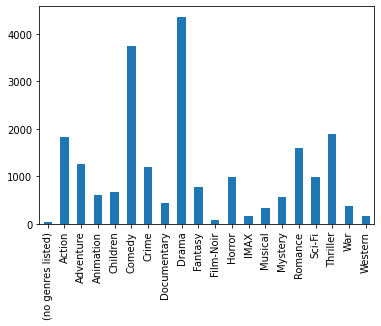

In [19]:
genres_sum.plot(kind='bar')